# Import bibliotek

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

# Wybranie datasetu i podział na zbiory

In [58]:
def choose_dataset(train_data, test_data):
    train_data = train_data
    test_data = test_data
    return train_data, test_data

In [59]:
x = pd.read_csv("data/data2008.csv")
y = pd.read_csv('data/data2009.csv')

In [60]:
if (len(x)) > len(y):
    x = x[:len(y)]
else:
    y = y[:len(x)]

# Sprawdzenie istnienia brakujących wartości

In [61]:
x = x[x["RainTomorrow"].notna()]
y = y[y["RainTomorrow"].notna()]

# Wyświetl wartości kategoryczne i liczbowe

In [62]:
categorical = [col for col in x.columns if x[col].dtypes == 'O']

categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [63]:
numerical = [col for col in x.columns if x[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Latitude',
 'Longitude',
 'Year',
 'Month',
 'Day']

# Odrzucanie wartości wysoce skorelowanych

In [64]:
x = x.drop(['Temp3pm', 'Temp9am', 'Humidity9am'], axis=1)
y = y.drop(['Temp3pm', 'Temp9am', 'Humidity9am'], axis=1)

In [65]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'RainToday', 'RainTomorrow', 'Latitude', 'Longitude', 'Year', 'Month',
       'Day'],
      dtype='object')

# Podział danych

In [66]:
X = x.drop(['RainTomorrow'], axis=1)

y = y['RainTomorrow']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1816, 19), (454, 19))

# Zakodowanie zmiennej RainToday

In [68]:
encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# Utworzenie zbioru treningowego.

In [69]:
print(X_train.columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'RainToday_0', 'RainToday_1', 'Latitude', 'Longitude', 'Year', 'Month',
       'Day'],
      dtype='object')


In [70]:
numerical = [col for col in numerical if col not in ['Humidity9am', 'Temp9am', 'Temp3pm']]

X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

# Utworzenie zbioru testowego.

In [71]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_test.Location),
                    pd.get_dummies(X_test.WindGustDir),
                    pd.get_dummies(X_test.WindDir9am),
                    pd.get_dummies(X_test.WindDir3pm),], axis=1)

In [72]:
cols = X_train.columns

In [73]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [74]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [75]:
X_test = pd.DataFrame(X_test, columns=[cols])

# Trenowanie modelu

In [76]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Kodowanie zmiennych kategorycznych

In [77]:
'''from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])
cleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])
cleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])
cleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])
'''

"from sklearn import preprocessing\nle = preprocessing.LabelEncoder()\ncleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])\ncleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])\ncleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])\ncleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])\n"

In [78]:
X_train.columns

MultiIndex([(      'MinTemp',),
            (      'MaxTemp',),
            (     'Rainfall',),
            ('WindGustSpeed',),
            ( 'WindSpeed9am',),
            ( 'WindSpeed3pm',),
            (  'Humidity3pm',),
            (  'Pressure9am',),
            (  'Pressure3pm',),
            (     'Latitude',),
            (    'Longitude',),
            (         'Year',),
            (        'Month',),
            (          'Day',),
            (  'RainToday_0',),
            (  'RainToday_1',),
            (     'Adelaide',),
            (       'Albany',),
            (       'Albury',),
            ( 'AliceSprings',),
            (     'Ballarat',),
            (      'Bendigo',),
            (     'Brisbane',),
            (       'Cairns',),
            (     'Canberra',),
            (       'Darwin',),
            (    'GoldCoast',),
            (       'Hobart',),
            (   'Launceston',),
            (    'Melbourne',),
            ( 'MountGambier',),
        

# Predykcja wyników

In [79]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 

In [80]:
logreg.predict_proba(X_test)[:, 0]

array([0.79888261, 0.77497464, 0.8106916 , 0.91531836, 0.78262481,
       0.88960586, 0.55165883, 0.88636162, 0.8059202 , 0.90431558,
       0.78692057, 0.82332025, 0.76292443, 0.7651362 , 0.85506088,
       0.80992515, 0.83682687, 0.80525092, 0.93772798, 0.74595081,
       0.93154896, 0.69488307, 0.86094912, 0.888312  , 0.90920585,
       0.81145955, 0.83584714, 0.63223322, 0.91658033, 0.78614543,
       0.75619977, 0.69207667, 0.85683717, 0.90084936, 0.89484601,
       0.83843104, 0.85282974, 0.75970743, 0.69326891, 0.730666  ,
       0.82236462, 0.78283853, 0.87078029, 0.50286825, 0.94621442,
       0.89602381, 0.7322623 , 0.75603109, 0.90283827, 0.83968757,
       0.80471329, 0.67851102, 0.82926217, 0.80777781, 0.55404872,
       0.69778184, 0.82597569, 0.88268173, 0.77743955, 0.61773306,
       0.92736597, 0.87967903, 0.89185789, 0.64810909, 0.96022346,
       0.94233393, 0.84452421, 0.70872155, 0.91563402, 0.91051198,
       0.36723343, 0.69377965, 0.88271309, 0.91330013, 0.93399

In [81]:
logreg.predict_proba(X_test)[:, 1]

array([0.20111739, 0.22502536, 0.1893084 , 0.08468164, 0.21737519,
       0.11039414, 0.44834117, 0.11363838, 0.1940798 , 0.09568442,
       0.21307943, 0.17667975, 0.23707557, 0.2348638 , 0.14493912,
       0.19007485, 0.16317313, 0.19474908, 0.06227202, 0.25404919,
       0.06845104, 0.30511693, 0.13905088, 0.111688  , 0.09079415,
       0.18854045, 0.16415286, 0.36776678, 0.08341967, 0.21385457,
       0.24380023, 0.30792333, 0.14316283, 0.09915064, 0.10515399,
       0.16156896, 0.14717026, 0.24029257, 0.30673109, 0.269334  ,
       0.17763538, 0.21716147, 0.12921971, 0.49713175, 0.05378558,
       0.10397619, 0.2677377 , 0.24396891, 0.09716173, 0.16031243,
       0.19528671, 0.32148898, 0.17073783, 0.19222219, 0.44595128,
       0.30221816, 0.17402431, 0.11731827, 0.22256045, 0.38226694,
       0.07263403, 0.12032097, 0.10814211, 0.35189091, 0.03977654,
       0.05766607, 0.15547579, 0.29127845, 0.08436598, 0.08948802,
       0.63276657, 0.30622035, 0.11728691, 0.08669987, 0.06600

# Dokładność

In [82]:
print('Model accuracy score: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8194


# Macierz pomyłek

In [83]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[371   3]
 [ 79   1]]

True Positives(TP) =  371

True Negatives(TN) =  1

False Positives(FP) =  3

False Negatives(FN) =  79


# Wizualizacja macierzy pomyłek z heatmapą seaborn


<Axes: >

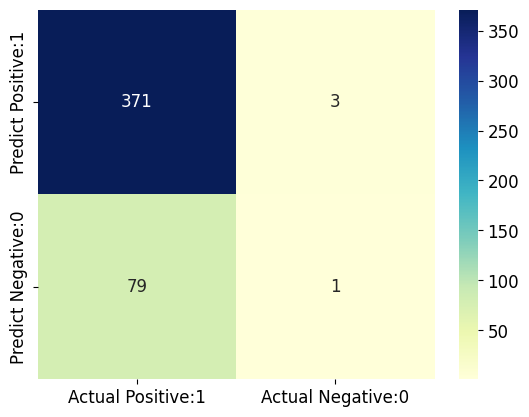

In [84]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Dokładność klasyfikatora


In [85]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8194


# Precyzja klasyfikatora

In [86]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9920


In [87]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

# Krzywa ROC

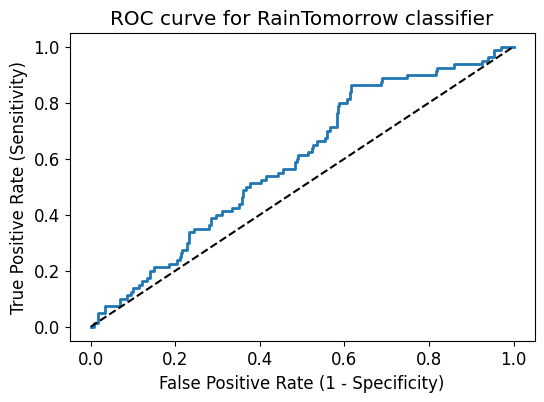

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='Yes')

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Eskport modelu

In [89]:
filename = "model.h5"
pickle.dump(logreg, open(filename, 'wb'))
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)



In [90]:
total_features = len(numerical) - len(['Temp3pm', 'Temp9am', 'Humidity9am'])
total_features += 2
total_features += sum([len(x[column].unique()) for column in categorical])
print(total_features)

88
